In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nifty50 = yf.Ticker("^NSEI")
nifty50 = nifty50.history(period="max")
nifty50 = pd.DataFrame(nifty50, columns=[ 'Close', 'Open'])
X = nifty50.iloc[:, :-1].values
y = nifty50.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
r_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)
r_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [5]:
y_pred = r_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

99.94842104084924

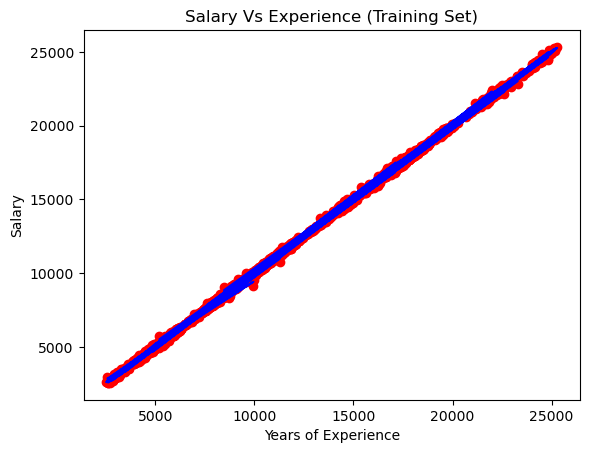

In [6]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, r_regressor.predict(X_train), color = 'blue')
plt.title('Salary Vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()